## Import Libraries

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import PredefinedSplit
from sklearn import tree
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

## Load Features

In [70]:
# Export feature table to file
feature_df = pd.read_csv("../Data/Features/features_191208.csv",index_col=0)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,home_prev_3_win_pct,home_prev_3_loss_pct,home_prev_3_gd,home_prev_3_gc,home_prev_3_gs,home_prev_3_cs,away_prev_3_result,away_prev_3_win,away_prev_3_loss,away_prev_3_draw,away_prev_3_win_pct,away_prev_3_loss_pct,away_prev_3_gd,away_prev_3_gc,away_prev_3_gs,away_prev_3_cs,x0_Arsenal,x0_Aston Villa,x0_Birmingham,x0_Blackburn,x0_Blackpool,x0_Bolton,x0_Bournemouth,x0_Brighton,x0_Burnley,x0_Cardiff,x0_Chelsea,x0_Crystal Palace,x0_Everton,x0_Fulham,x0_Huddersfield,x0_Hull,x0_Leicester,x0_Liverpool,x0_Man City,x0_Man United,x0_Middlesbrough,x0_Newcastle,x0_Norwich,x0_Portsmouth,x0_QPR,x0_Reading,x0_Southampton,x0_Stoke,x0_Sunderland,x0_Swansea,x0_Tottenham,x0_Watford,x0_West Brom,x0_West Ham,x0_Wigan,x0_Wolves,x1_Arsenal,x1_Aston Villa,x1_Birmingham,x1_Blackburn,x1_Blackpool,x1_Bolton,x1_Bournemouth,x1_Brighton,x1_Burnley,x1_Cardiff,x1_Chelsea,x1_Crystal Palace,x1_Everton,x1_Fulham,x1_Huddersfield,x1_Hull,x1_Leicester,x1_Liverpool,x1_Man City,x1_Man United,x1_Middlesbrough,x1_Newcastle,x1_Norwich,x1_Portsmouth,x1_QPR,x1_Reading,x1_Southampton,x1_Stoke,x1_Sunderland,x1_Swansea,x1_Tottenham,x1_Watford,x1_West Brom,x1_West Ham,x1_Wigan,x1_Wolves,x2_0809,x2_0910,x2_1011,x2_1112,x2_1213,x2_1314,x2_1415,x2_1516,x2_1617,x2_1718,x2_1819,x3_E0,x4_DDD,x4_DDL,x4_DDW,x4_DLD,x4_DLL,x4_DLW,x4_DWD,x4_DWL,x4_DWW,x4_LDD,x4_LDL,x4_LDW,x4_LLD,x4_LLL,x4_LLW,x4_LWD,x4_LWL,x4_LWW,x4_WDD,x4_WDL,x4_WDW,x4_WLD,x4_WLL,x4_WLW,x4_WWD,x4_WWL,x4_WWW,x5_DDD,x5_DDL,x5_DDW,x5_DLD,x5_DLL,x5_DLW,x5_DWD,x5_DWL,x5_DWW,x5_LDD,x5_LDL,x5_LDW,x5_LLD,x5_LLL,x5_LLW,x5_LWD,x5_LWL,x5_LWW,x5_WDD,x5_WDL,x5_WDW,x5_WLD,x5_WLL,x5_WLW,x5_WWD,x5_WWL,x5_WWW
728,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,WWD,2,0,1,0.666667,0.000000,0.0,2.0,8.0,2,LLW,1,2,0,0.333333,0.666667,5.0,7.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,Chelsea,Swansea,2015-08-08,1516,E0,D,WLD,1,1,1,0.333333,0.333333,5.0,5.0,4.0,0,LLW,1,2,0,0.333333,0.666667,-2.0,5.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,Everton,Watford,2015-08-08,1516,E0,D,LWL,1,2,0,0.333333,0.666667,-4.0,4.0,2.0,0,DWW,2,0,1,0.666667,0.000000,-1.0,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,Leicester,Sunderland,2015-08-08,1516,E0,H,WDW,2,0,1,0.666667,0.000000,6.0,1.0,7.0,2,LDD,0,1,2,0.000000,0.333333,2.0,3.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [71]:
# Fix data types
feature_df['Date'] = feature_df['Date'].apply(func=datetime.datetime.strptime,args=["%Y-%m-%d"])
feature_df['Season'] = feature_df['Season'].apply(func=str)
feature_df['Season'] = feature_df['Season'].apply(lambda x: '0'+x if len(x)<4 else x)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,home_prev_3_win_pct,home_prev_3_loss_pct,home_prev_3_gd,home_prev_3_gc,home_prev_3_gs,home_prev_3_cs,away_prev_3_result,away_prev_3_win,away_prev_3_loss,away_prev_3_draw,away_prev_3_win_pct,away_prev_3_loss_pct,away_prev_3_gd,away_prev_3_gc,away_prev_3_gs,away_prev_3_cs,x0_Arsenal,x0_Aston Villa,x0_Birmingham,x0_Blackburn,x0_Blackpool,x0_Bolton,x0_Bournemouth,x0_Brighton,x0_Burnley,x0_Cardiff,x0_Chelsea,x0_Crystal Palace,x0_Everton,x0_Fulham,x0_Huddersfield,x0_Hull,x0_Leicester,x0_Liverpool,x0_Man City,x0_Man United,x0_Middlesbrough,x0_Newcastle,x0_Norwich,x0_Portsmouth,x0_QPR,x0_Reading,x0_Southampton,x0_Stoke,x0_Sunderland,x0_Swansea,x0_Tottenham,x0_Watford,x0_West Brom,x0_West Ham,x0_Wigan,x0_Wolves,x1_Arsenal,x1_Aston Villa,x1_Birmingham,x1_Blackburn,x1_Blackpool,x1_Bolton,x1_Bournemouth,x1_Brighton,x1_Burnley,x1_Cardiff,x1_Chelsea,x1_Crystal Palace,x1_Everton,x1_Fulham,x1_Huddersfield,x1_Hull,x1_Leicester,x1_Liverpool,x1_Man City,x1_Man United,x1_Middlesbrough,x1_Newcastle,x1_Norwich,x1_Portsmouth,x1_QPR,x1_Reading,x1_Southampton,x1_Stoke,x1_Sunderland,x1_Swansea,x1_Tottenham,x1_Watford,x1_West Brom,x1_West Ham,x1_Wigan,x1_Wolves,x2_0809,x2_0910,x2_1011,x2_1112,x2_1213,x2_1314,x2_1415,x2_1516,x2_1617,x2_1718,x2_1819,x3_E0,x4_DDD,x4_DDL,x4_DDW,x4_DLD,x4_DLL,x4_DLW,x4_DWD,x4_DWL,x4_DWW,x4_LDD,x4_LDL,x4_LDW,x4_LLD,x4_LLL,x4_LLW,x4_LWD,x4_LWL,x4_LWW,x4_WDD,x4_WDL,x4_WDW,x4_WLD,x4_WLL,x4_WLW,x4_WWD,x4_WWL,x4_WWW,x5_DDD,x5_DDL,x5_DDW,x5_DLD,x5_DLL,x5_DLW,x5_DWD,x5_DWL,x5_DWW,x5_LDD,x5_LDL,x5_LDW,x5_LLD,x5_LLL,x5_LLW,x5_LWD,x5_LWL,x5_LWW,x5_WDD,x5_WDL,x5_WDW,x5_WLD,x5_WLL,x5_WLW,x5_WWD,x5_WWL,x5_WWW
728,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,WWD,2,0,1,0.666667,0.000000,0.0,2.0,8.0,2,LLW,1,2,0,0.333333,0.666667,5.0,7.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,Chelsea,Swansea,2015-08-08,1516,E0,D,WLD,1,1,1,0.333333,0.333333,5.0,5.0,4.0,0,LLW,1,2,0,0.333333,0.666667,-2.0,5.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,Everton,Watford,2015-08-08,1516,E0,D,LWL,1,2,0,0.333333,0.666667,-4.0,4.0,2.0,0,DWW,2,0,1,0.666667,0.000000,-1.0,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,Leicester,Sunderland,2015-08-08,1516,E0,H,WDW,2,0,1,0.666667,0.000000,6.0,1.0,7.0,2,LDD,0,1,2,0.000000,0.333333,2.0,3.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [72]:
# Check feature data types
dict(feature_df.dtypes)

{'HomeTeam': dtype('O'),
 'AwayTeam': dtype('O'),
 'Date': dtype('<M8[ns]'),
 'Season': dtype('O'),
 'Div': dtype('O'),
 'FTR': dtype('O'),
 'home_prev_3_result': dtype('O'),
 'home_prev_3_win': dtype('int64'),
 'home_prev_3_loss': dtype('int64'),
 'home_prev_3_draw': dtype('int64'),
 'home_prev_3_win_pct': dtype('float64'),
 'home_prev_3_loss_pct': dtype('float64'),
 'home_prev_3_gd': dtype('float64'),
 'home_prev_3_gc': dtype('float64'),
 'home_prev_3_gs': dtype('float64'),
 'home_prev_3_cs': dtype('int64'),
 'away_prev_3_result': dtype('O'),
 'away_prev_3_win': dtype('int64'),
 'away_prev_3_loss': dtype('int64'),
 'away_prev_3_draw': dtype('int64'),
 'away_prev_3_win_pct': dtype('float64'),
 'away_prev_3_loss_pct': dtype('float64'),
 'away_prev_3_gd': dtype('float64'),
 'away_prev_3_gc': dtype('float64'),
 'away_prev_3_gs': dtype('float64'),
 'away_prev_3_cs': dtype('int64'),
 'x0_Arsenal': dtype('float64'),
 'x0_Aston Villa': dtype('float64'),
 'x0_Birmingham': dtype('float64'),
 '

## Split Training and Test Datasets

In [152]:
cat_feature = ['HomeTeam','AwayTeam','Season','Div','home_prev_3_result','away_prev_3_result']
remove_feature = ['Date','FTR']
# Split final validation set (18-19 Season)
test_df = feature_df[feature_df['Season']=='1819']
train_df = feature_df[feature_df['Season']!='1819']
# Separate label from data
train_label = train_df['FTR']
test_label = test_df['FTR']
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)
print(f"Size of training set: {len(train_df)}\nSize of test set: {len(test_df)}\nNumber of features: {train_df.shape[1]}")

Size of training set: 3800
Size of test set: 380
Number of features: 162


In [153]:
# Seasons for doing a grouped k-fold cross-validation
cv_seasons = list(train_df['Season'].unique())
cv_seasons.sort()
cv_seasons

['0809',
 '0910',
 '1011',
 '1112',
 '1213',
 '1314',
 '1415',
 '1516',
 '1617',
 '1718']

In [155]:
# Define cross-validation folds
cv_fold = []
for ind,season in enumerate(cv_seasons):
    test_seasons = cv_seasons[ind]
    buffer_seasons = None
    if ind < (len(cv_seasons)-1):
        buffer_seasons = cv_seasons[ind+1]
    train_seasons = [s for s in cv_seasons if s not in [test_seasons,buffer_seasons]]
    train_ind = np.array(train_df['Season'].isin(train_seasons))
    test_ind = np.array(train_df['Season'].isin([test_seasons]))
    cv_fold.append((train_ind,test_ind))
cv_fold

[(array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ...,  True,  True,  True])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([ True,  True,  True, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  arra

In [158]:
# Drop categorical features (already one-hot-encoded)
train_df = train_df.drop(cat_feature,axis=1)
test_df = test_df.drop(cat_feature,axis=1)

## Training Decision Tree Model

In [181]:
# Hyperparameter tuning (Cross-validation)
max_depth = [2,4,8,16,32]
acc_score = []
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(clf,X=train_df,y=train_label,cv=cv_fold)
    acc_score.append((depth,scores['test_score'].mean()))
acc_score

[(2, 0.45473684210526316),
 (4, 0.46078947368421047),
 (8, 0.45921052631578946),
 (16, 0.4476315789473685),
 (32, 0.41263157894736835)]

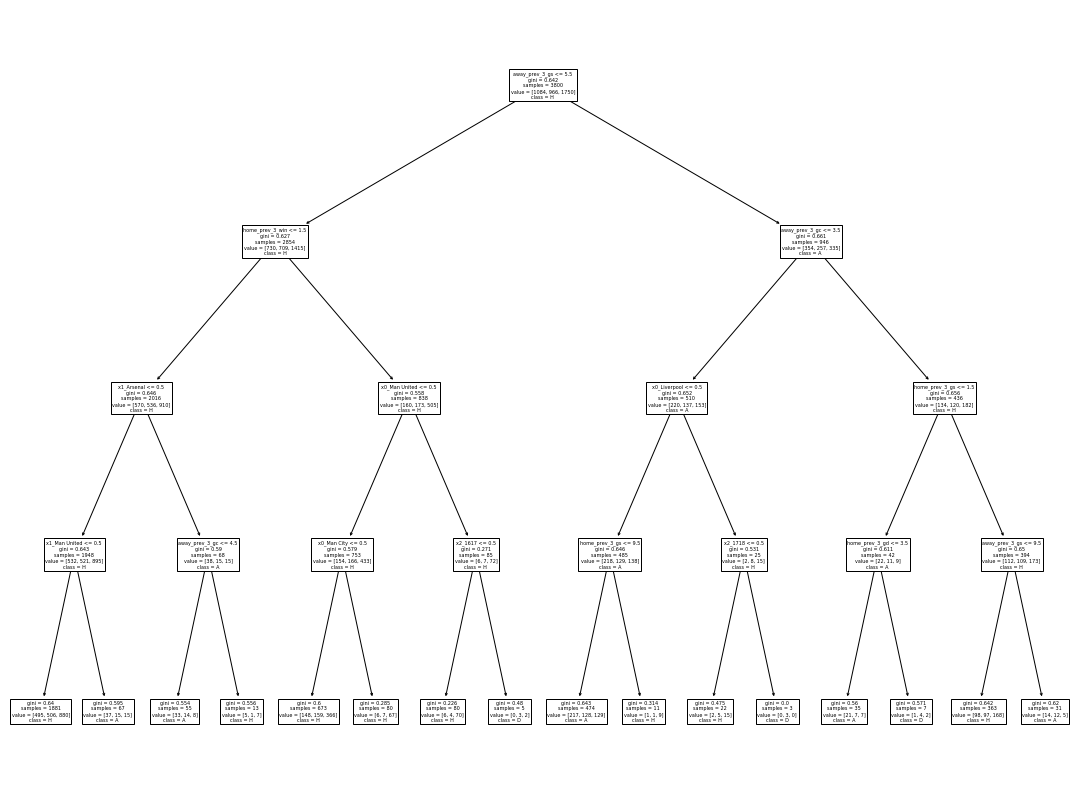

In [187]:
# Train decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X=train_df,y=train_label)
plt.figure(figsize=[6.4*3,4.8*3])
tree.plot_tree(clf,feature_names=train_df.columns,class_names=clf.classes_)
plt.show()

In [184]:
# Test decision tree classifier
clf.score(test_df,test_label)

0.5210526315789473